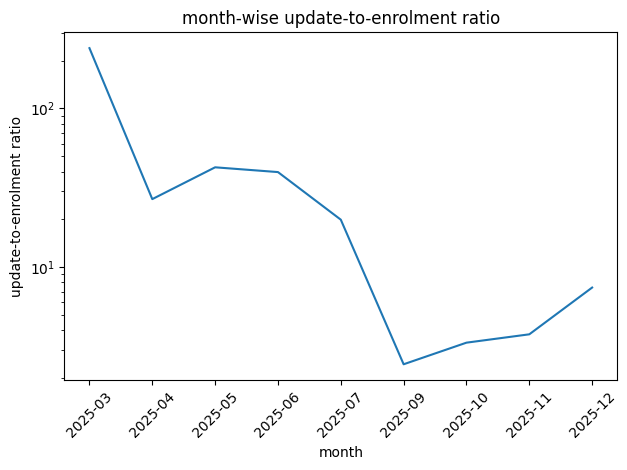

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

enrolment_df["month"]=pd.to_datetime(enrolment_df["date"]).dt.to_period("M").astype(str)
updates=pd.concat([demographic_df,biometric_df])
updates["month"]=pd.to_datetime(updates["date"]).dt.to_period("M").astype(str)

month_enrolments=enrolment_df.groupby("month").size()
month_updates=updates.groupby("month").size()

ratio=(month_updates/month_enrolments).dropna().sort_index()

# Enhanced visualization
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(ratio.index, ratio.values, linewidth=2.5, color="#e74c3c", marker="o", markersize=4)

ax.set_yscale("log")

# Format y-axis
def format_ratio(y, pos):
    if y >= 1:
        return f"{y:.1f}"
    else:
        return f"{y:.2f}"

ax.yaxis.set_major_formatter(FuncFormatter(format_ratio))

ax.tick_params(axis="x", rotation=45, labelsize=9)
ax.set_xlabel("Month", fontsize=11, fontweight="bold")
ax.set_ylabel("Update-to-Enrolment Ratio (log scale)", fontsize=11, fontweight="bold")
ax.set_title("Month-wise Update-to-Enrolment Ratio", fontsize=14, fontweight="bold", pad=15)

# Grid and styling
ax.grid(axis="y", linestyle="--", alpha=0.3, which="both")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#f8f9fa")
fig.patch.set_facecolor("white")

plt.tight_layout()
plt.show()


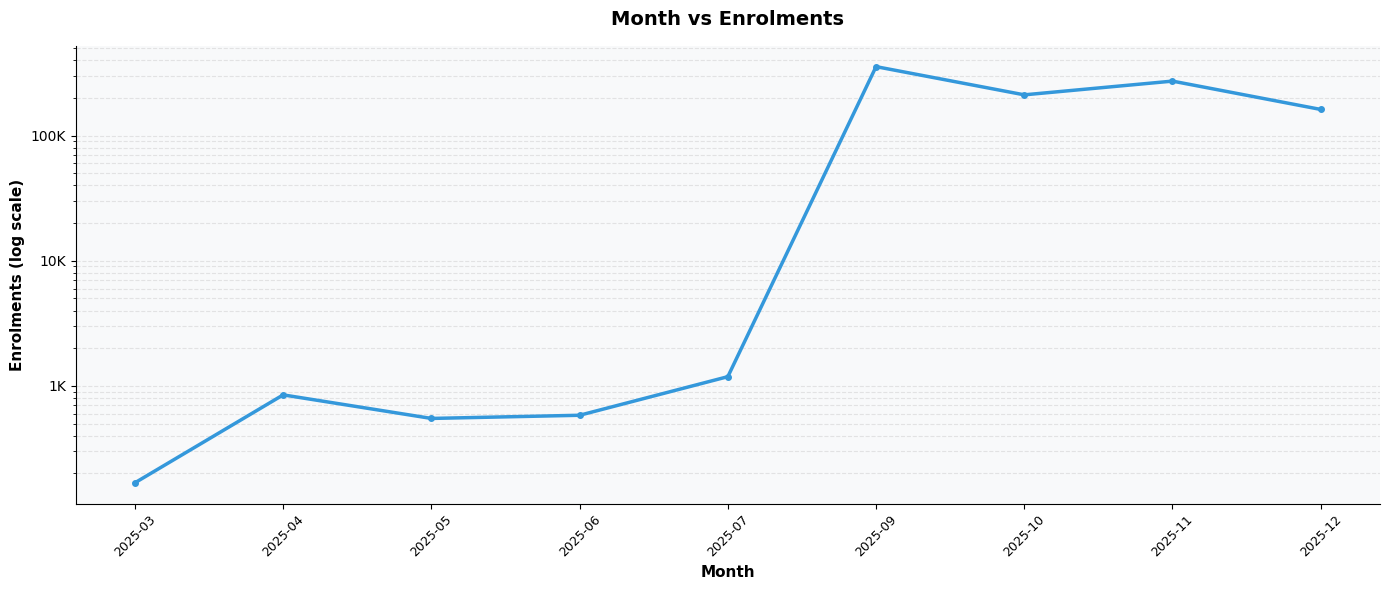

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")

# convert date to month
enrolment_df["month"]=pd.to_datetime(enrolment_df["date"]).dt.to_period("M").astype(str)

# month-wise enrolments
month_enrolments=(
    enrolment_df
    .groupby("month")
    .size()
    .sort_index()
)

# Enhanced visualization
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(month_enrolments.index, month_enrolments.values, linewidth=2.5, color="#3498db", marker="o", markersize=4)

ax.set_yscale("log")

# Format y-axis to show values in millions
def format_millions(y, pos):
    if y >= 1_000_000:
        return f"{y/1_000_000:.1f}M"
    elif y >= 1_000:
        return f"{y/1_000:.0f}K"
    else:
        return f"{y:.0f}"

ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

ax.tick_params(axis="x", rotation=45, labelsize=9)
ax.set_xlabel("Month", fontsize=11, fontweight="bold")
ax.set_ylabel("Enrolments (log scale)", fontsize=11, fontweight="bold")
ax.set_title("Month vs Enrolments", fontsize=14, fontweight="bold", pad=15)

# Grid and styling
ax.grid(axis="y", linestyle="--", alpha=0.3, which="both")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#f8f9fa")
fig.patch.set_facecolor("white")

plt.tight_layout()
plt.show()


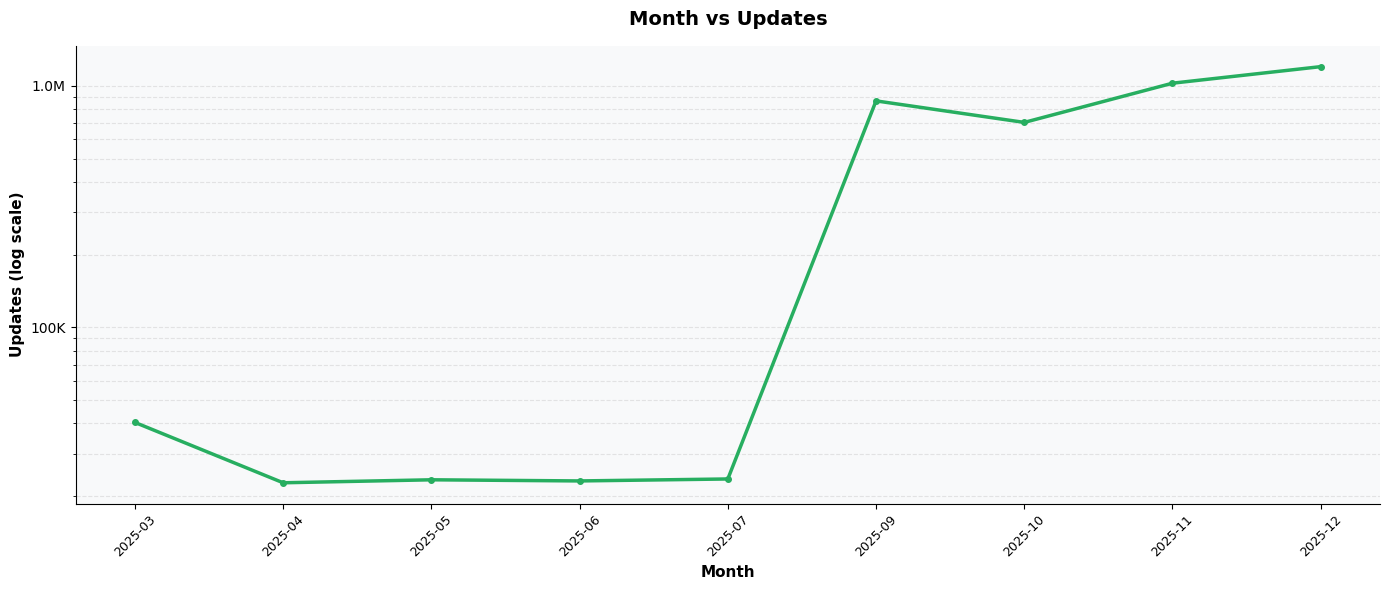

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

# combine updates
updates=pd.concat([demographic_df,biometric_df])

# convert date to month
updates["month"]=pd.to_datetime(updates["date"]).dt.to_period("M").astype(str)

# month-wise updates
month_updates=(
    updates
    .groupby("month")
    .size()
    .sort_index()
)

# Enhanced visualization
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(month_updates.index, month_updates.values, linewidth=2.5, color="#27ae60", marker="o", markersize=4)

ax.set_yscale("log")

# Format y-axis to show values in millions
def format_millions(y, pos):
    if y >= 1_000_000:
        return f"{y/1_000_000:.1f}M"
    elif y >= 1_000:
        return f"{y/1_000:.0f}K"
    else:
        return f"{y:.0f}"

ax.yaxis.set_major_formatter(FuncFormatter(format_millions))

ax.tick_params(axis="x", rotation=45, labelsize=9)
ax.set_xlabel("Month", fontsize=11, fontweight="bold")
ax.set_ylabel("Updates (log scale)", fontsize=11, fontweight="bold")
ax.set_title("Month vs Updates", fontsize=14, fontweight="bold", pad=15)

# Grid and styling
ax.grid(axis="y", linestyle="--", alpha=0.3, which="both")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_facecolor("#f8f9fa")
fig.patch.set_facecolor("white")

plt.tight_layout()
plt.show()
